In [1]:
#Importing all necessary libraries
import mysql.connector 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


In [2]:

# Connect to the MySQL database
conn=mysql.connector.connect(
   host='localhost',
    user='root',
    passwd='0000',
    database="danlc"
)


# Create a cursor object
cursor = conn.cursor()

# SQL query to fetch data
query = "SELECT * FROM video_games_sales;"

# Execute the query
cursor.execute(query)

# Fetch all rows
rows = cursor.fetchall()

# Fetch column names from the cursor
columns = [desc[0] for desc in cursor.description]

# Load data into a Pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

# Close the cursor and connection
cursor.close()
conn.close()


In [3]:
# displaying first 5 rows
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,,,,,,
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,,,,,,


In [4]:
# checking the size of rows and column
df.shape

(16450, 16)

In [5]:
# checking the data type of each column
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score        object
Critic_Count        object
User_Score          object
User_Count          object
Developer           object
Rating              object
dtype: object

In [6]:
df["Name"] = df["Name"].replace('', None).astype(str)
df['Platform'] = df['Platform'].replace('', None).astype(str)
df['Genre'] = df['Genre'].replace('', None).astype(str)
df['Publisher'] = df['Publisher'].replace('', None).astype(str)
df["User_Score"] = df['User_Score'].replace("", None).astype(float)
df["User_Count"] = df['User_Count'].replace("", None).astype('Int64')  # 'Int64' supports nullable integers
df["Critic_Count"] = df['Critic_Count'].replace("", None).astype('Int64')  # 'Int64' for nullable integers
df["Critic_Score"] = df['Critic_Score'].replace("", None).astype(float)
df['Developer'] = df['Developer'].replace("", None).astype(str)
df["Rating"] = df["Rating"].replace("", None).astype(str)

In [7]:
# null values present in each column
df.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         8987
User_Count         8987
Developer             0
Rating                0
dtype: int64

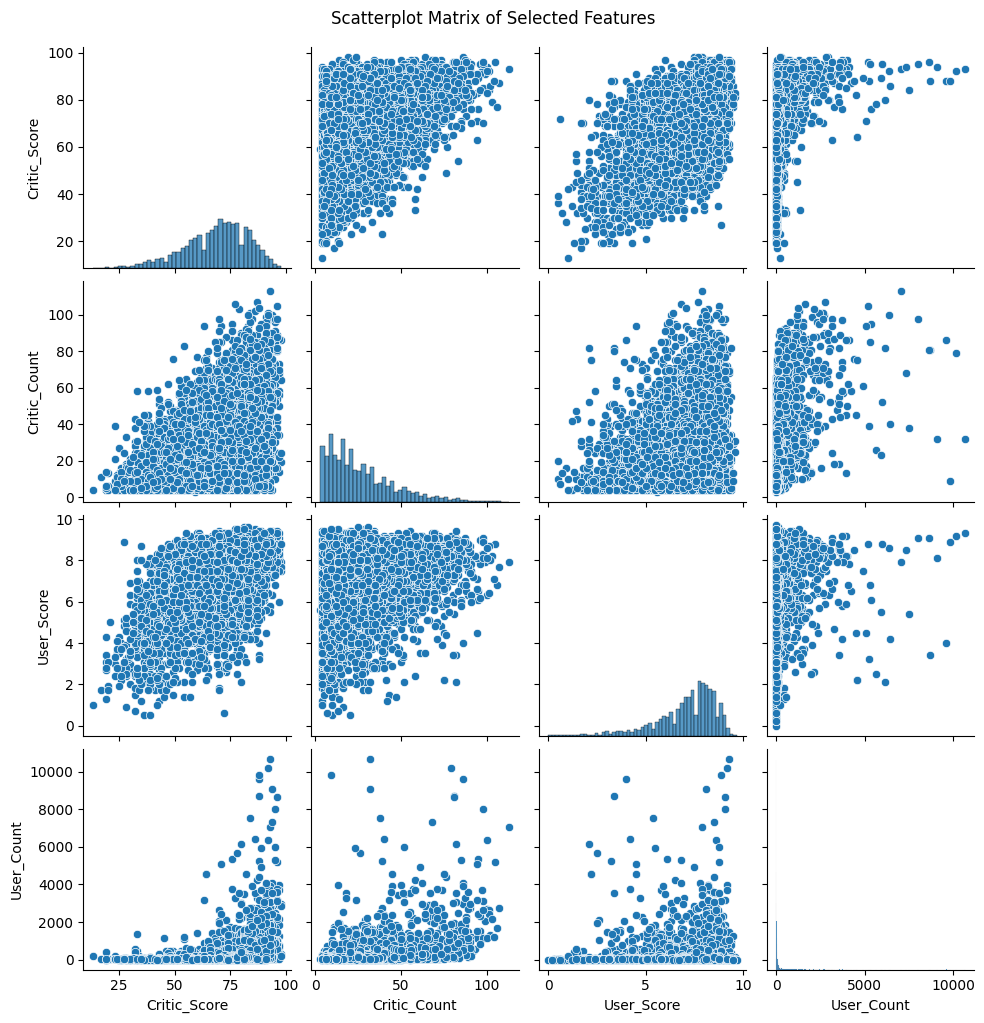

In [8]:
# Select the features you want to plot
features = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Plot the pairplot (scatterplot matrix) for the selected features
sns.pairplot(df[features])

# Adjust the layout to ensure everything fits well
plt.suptitle('Scatterplot Matrix of Selected Features', y=1.02)
plt.show()

In [9]:
df["User_Count"] = df["User_Count"].fillna(int(df['User_Count'].mean()))
df["User_Score"] = df["User_Score"].fillna(df["User_Score"].mean())  # Keep as float if scores can be decimal
df["Critic_Count"] = df["Critic_Count"].fillna(int(df['Critic_Count'].mean()))
df["Critic_Score"] = df["Critic_Score"].fillna(df["Critic_Score"].mean())  # Keep as float if scores can be decimal

In [10]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.000000,16450.0,16450.000000,16450.0
mean,2006.487356,0.264041,0.145909,0.078464,0.047582,0.536252,68.994363,26.214164,7.126330,163.006869
std,5.878995,0.818324,0.506639,0.311046,0.187973,1.558437,9.696773,13.242985,1.009924,379.779678
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.0,0.000000,4.0
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.994363,22.0,7.126330,30.0
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.994363,26.0,7.126330,163.0
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.0,7.300000,163.0
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.0,9.700000,10665.0


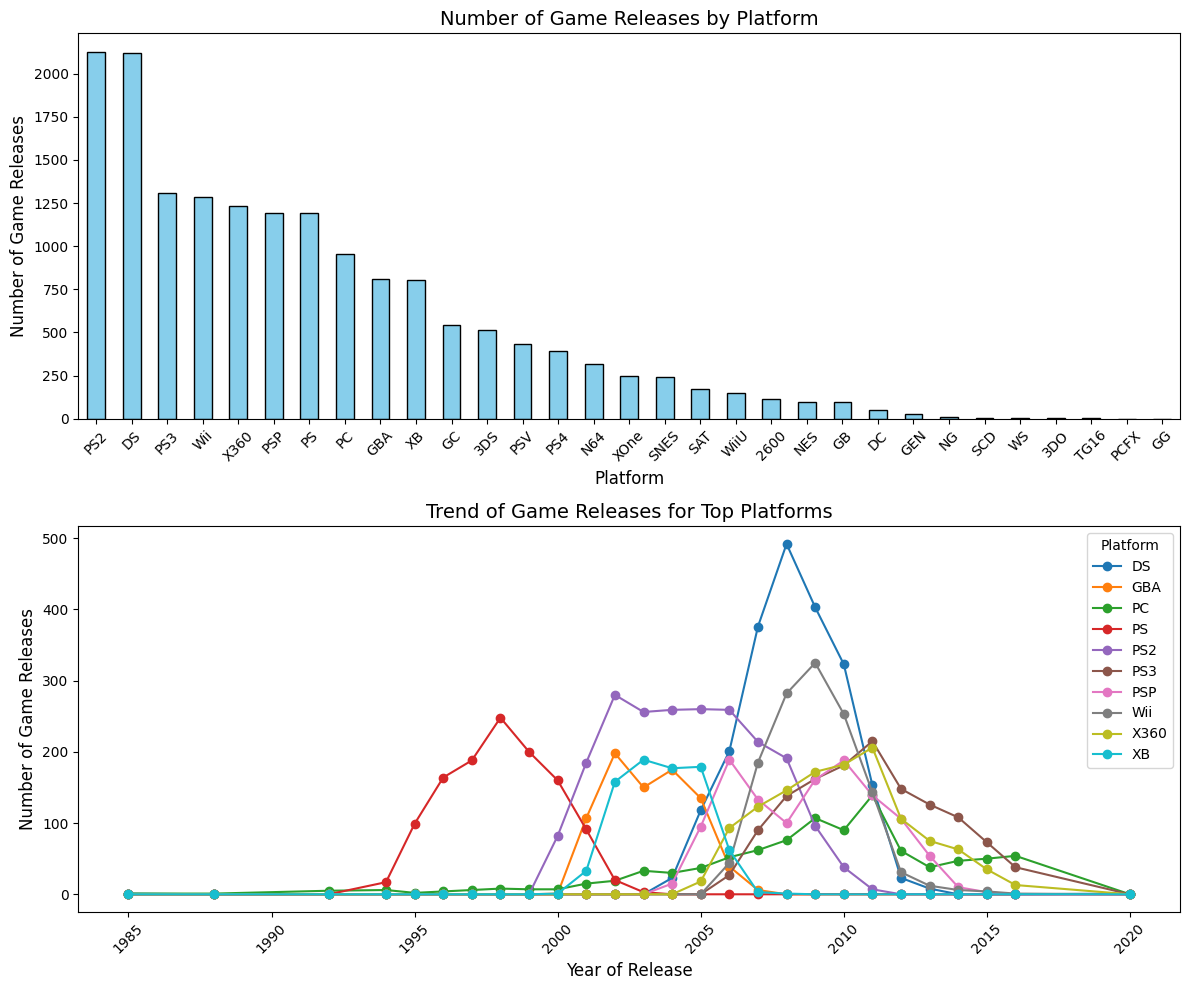

In [11]:
#Analyzing Number of games release on platform and it's trend
#Group by 'Platform' and count the number of game releases
platform_game_count = df.groupby('Platform').size()

#Sort platforms by the count of game releases
platform_game_count_sorted = platform_game_count.sort_values(ascending=False)

# Analyze the trend of game releases by year for selected platforms
# Select the top 10 platforms for visualization
top_platforms = platform_game_count_sorted.head(10).index
trend_data = df[df['Platform'].isin(top_platforms)]
trend_data_grouped = trend_data.groupby(['Year_of_Release', 'Platform']).size().unstack(fill_value=0)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

#  Bar chart for number of game releases by platform
platform_game_count_sorted.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Platform', fontsize=12)
axes[0].set_ylabel('Number of Game Releases', fontsize=12)
axes[0].set_title('Number of Game Releases by Platform', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Line chart for trend of game releases for top platforms
trend_data_grouped.plot(ax=axes[1], marker='o')
axes[1].set_xlabel('Year of Release', fontsize=12)
axes[1].set_ylabel('Number of Game Releases', fontsize=12)
axes[1].set_title('Trend of Game Releases for Top Platforms', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


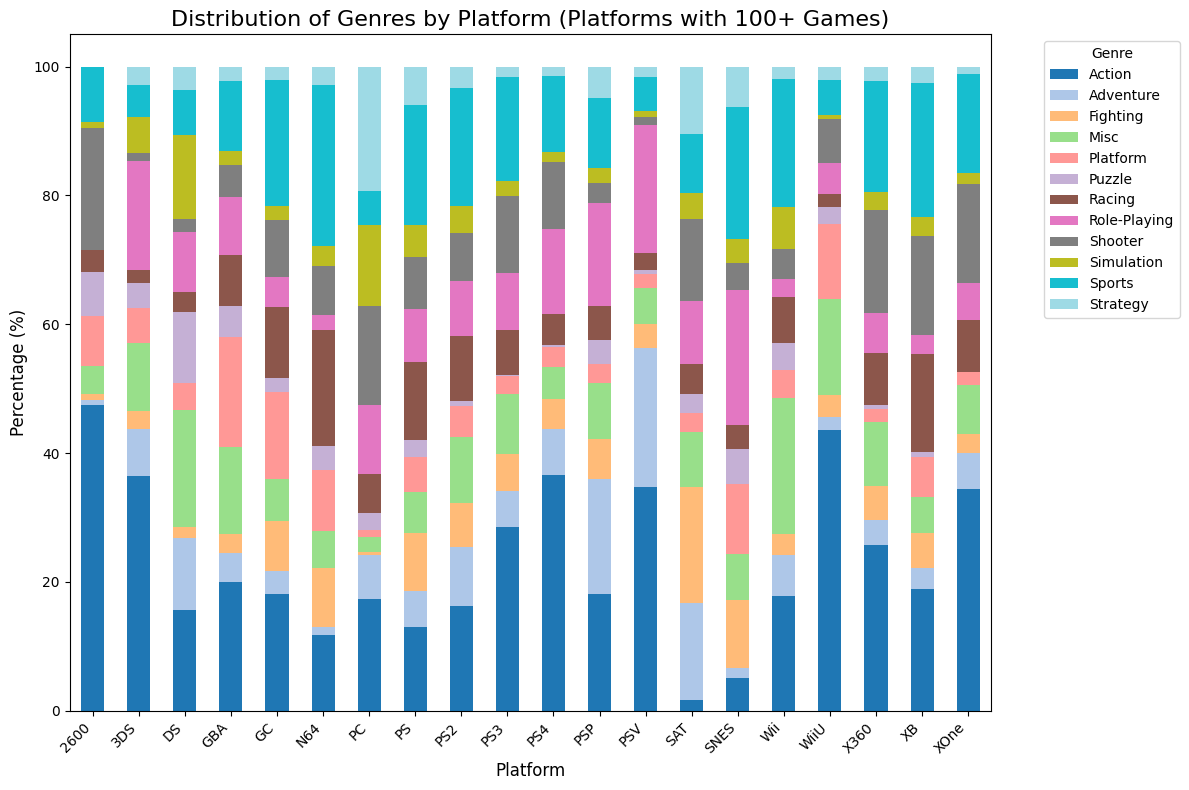

In [12]:
# Analyzing Distribution of games genre on different platform
# Calculate the number of games per platform
platform_counts = df['Platform'].value_counts()

# Filter platforms with at least 100 games
platforms_to_include = platform_counts[platform_counts >= 100].index
filtered_df = df[df['Platform'].isin(platforms_to_include)]

# Grouping and calculating the distribution
genre_distribution = filtered_df.groupby(['Platform', 'Genre']).size().unstack(fill_value=0)

# Normalize to percentage
genre_distribution_percentage = genre_distribution.div(genre_distribution.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
genre_distribution_percentage.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    colormap='tab20'
)

# Adding labels and title
plt.title('Distribution of Genres by Platform (Platforms with 100+ Games)', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
# Define platform categories
mobile_platforms = ['GBA', 'PSP', 'DS', '3DS', 'PSV', 'NG', 'GG', 'WS']
computer_platforms = ['PC']
console_platforms = [
    'Wii', 'WiiU', 'NES', 'SNES', 'N64', 'GC', 'X360', 'XB', 'XOne',
    'PS', 'PS2', 'PS3', 'PS4', '2600', 'GEN', 'DC', 'SCD', 'SAT', 
    '3DO', 'PCFX', 'TG16'
]

# Categorize platforms
def categorize_platform(platform):
    if platform in mobile_platforms:
        return 'Handheld Console'
    elif platform in computer_platforms:
        return 'Computer'
    elif platform in console_platforms:
        return 'Console'
    else:
        return 'Other'

# Apply the function to create a new column
df['Platform_Type'] = df['Platform'].apply(categorize_platform)

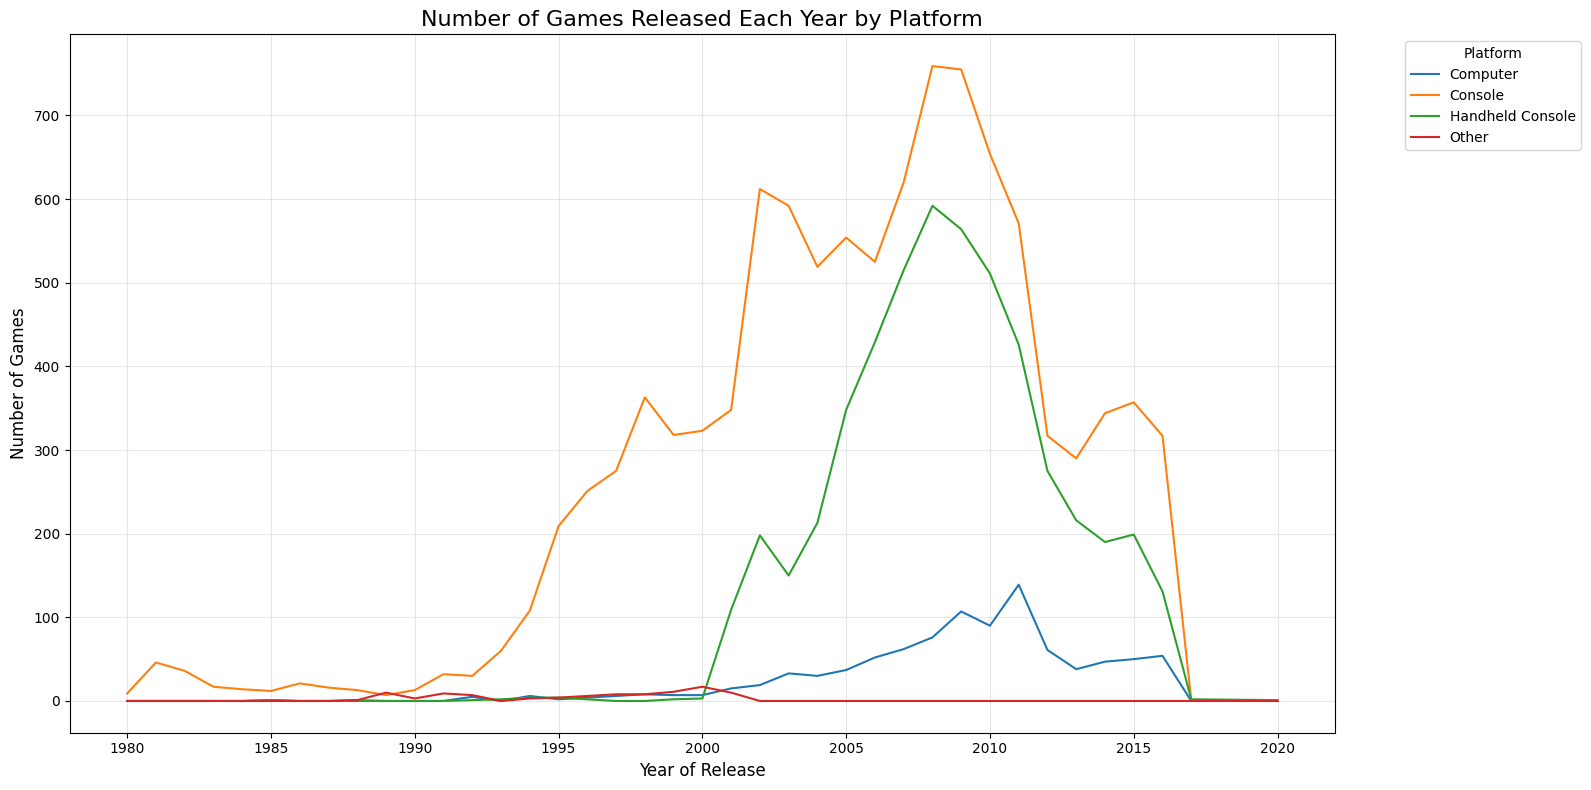

In [14]:
# Analyzing number of games release on different platform's type
# Group data by Year_of_Release and Platform
games_per_year = df.groupby(["Year_of_Release", "Platform_Type"]).size().reset_index(name="Game_Count")
# Pivot the table to create a format suitable for a line chart
pivot_data = games_per_year.pivot(index="Year_of_Release", columns="Platform_Type", values="Game_Count").fillna(0)

# Plot the line chart
plt.figure(figsize=(16, 8))
for platform in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[platform], label=platform)

# Add labels and legend
plt.title("Number of Games Released Each Year by Platform", fontsize=16)
plt.xlabel("Year of Release", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


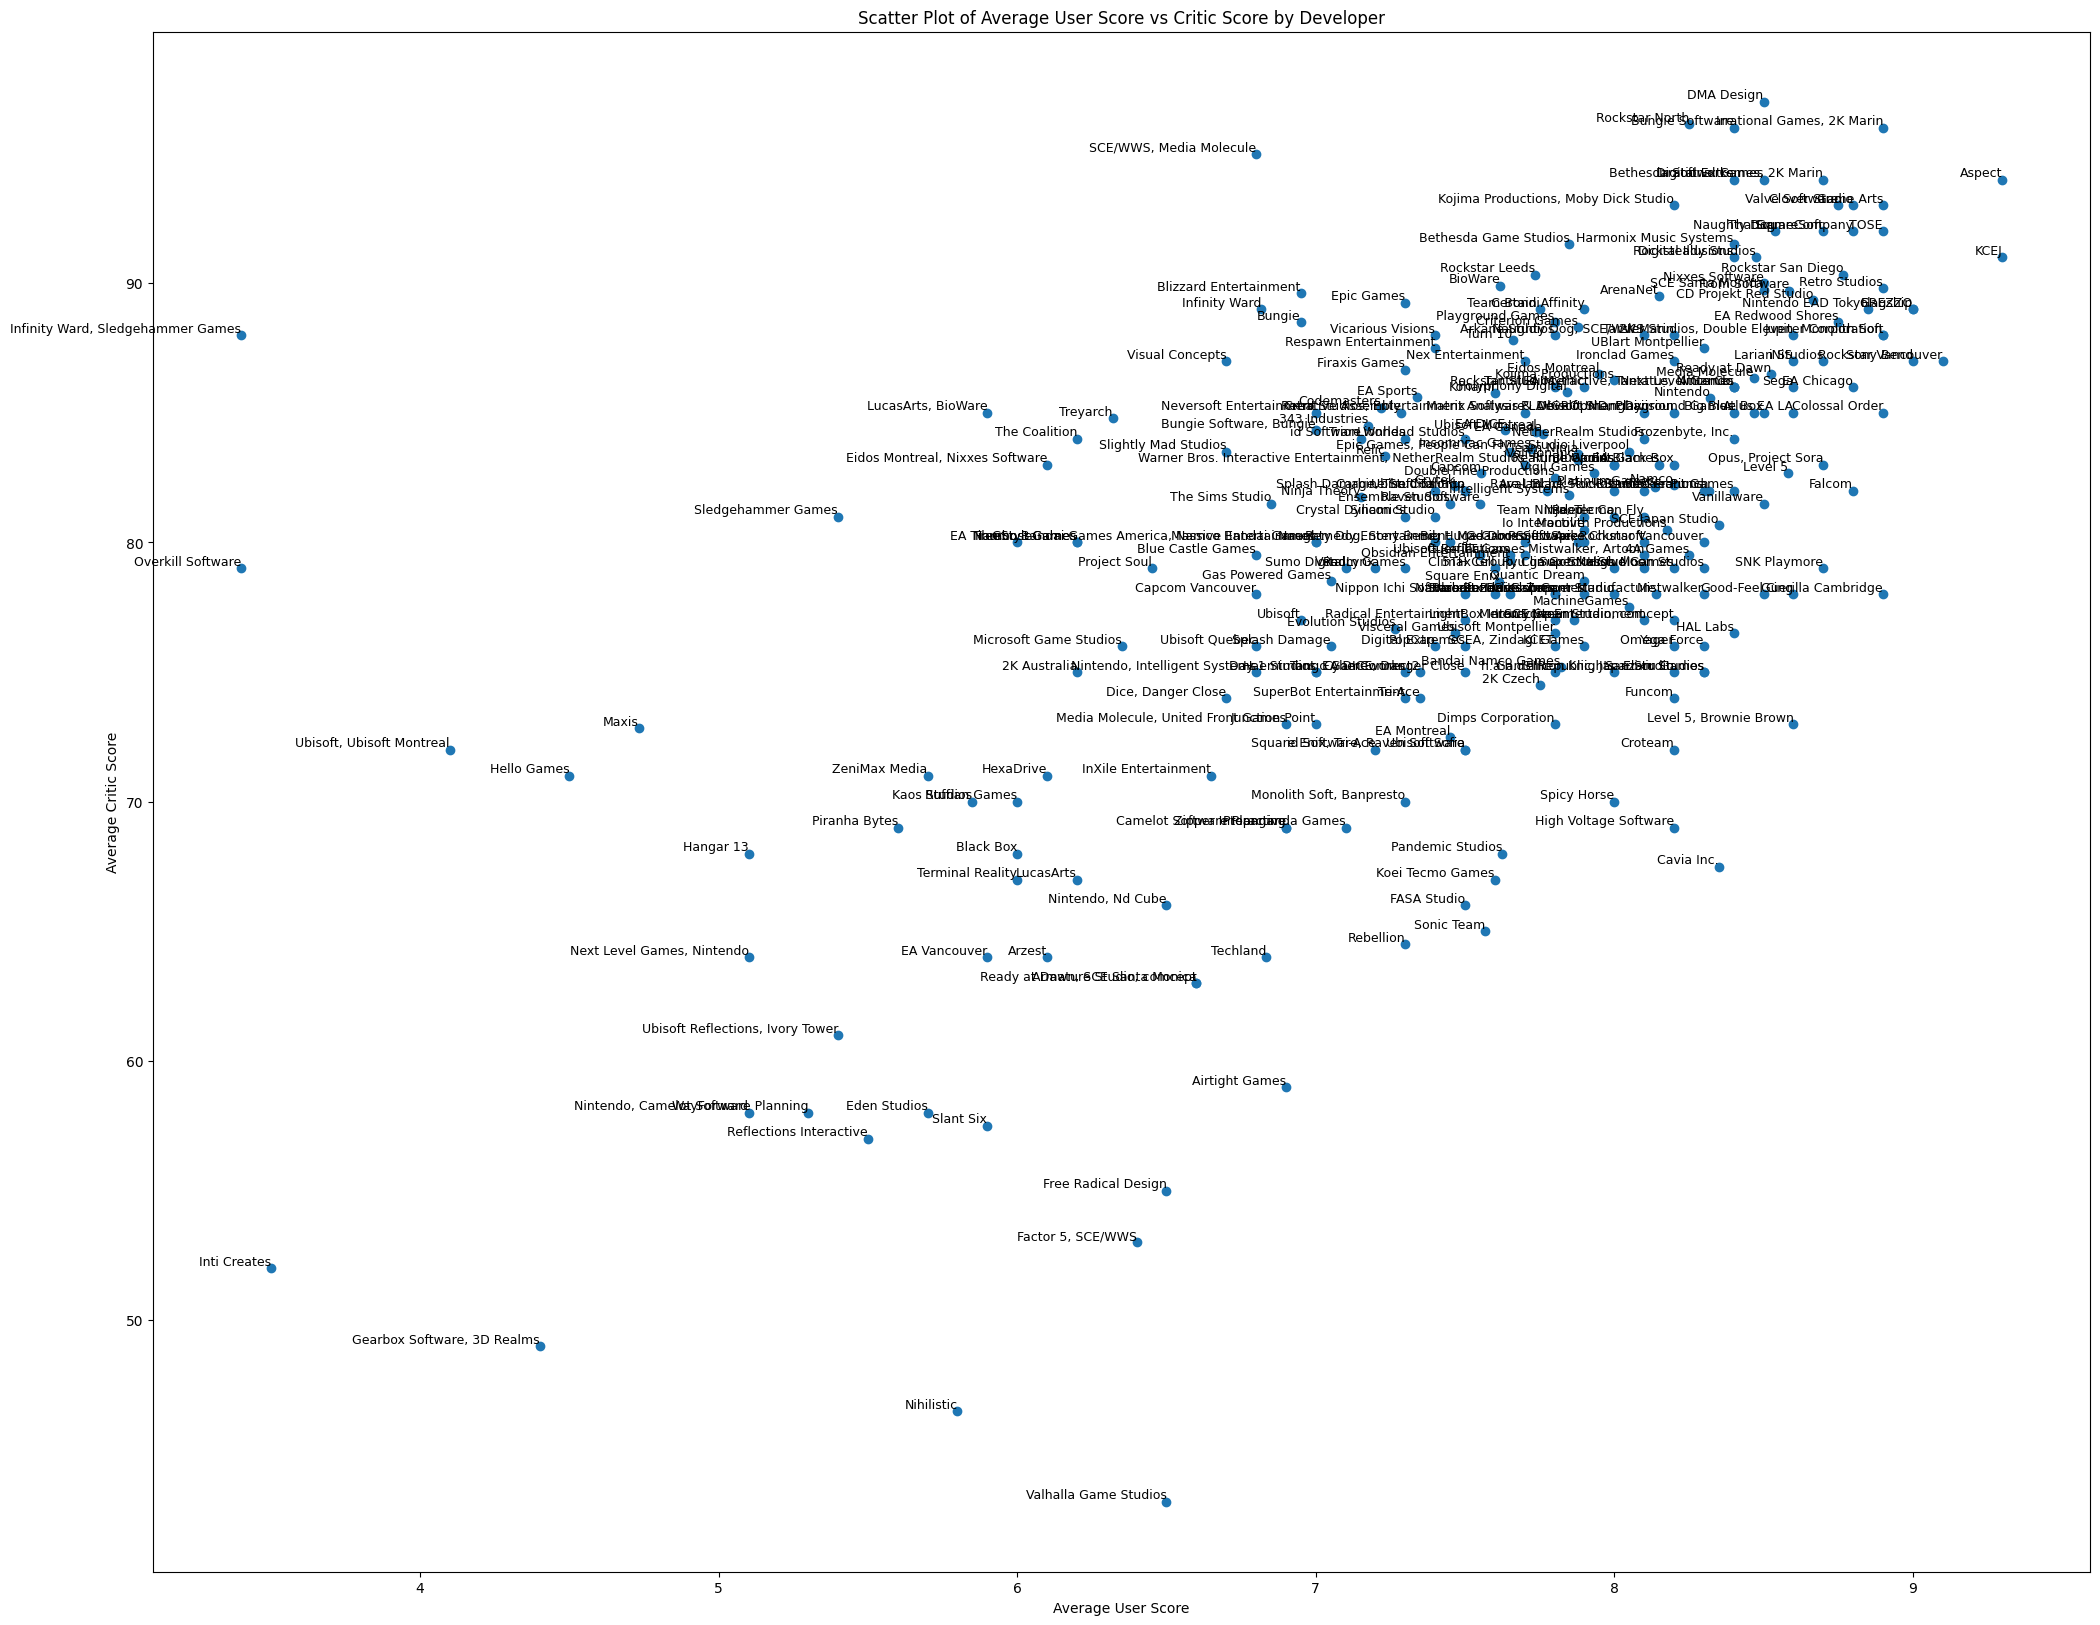

In [15]:
# Displaying the Developers rating from critic and users
# Filter the DataFrame based on User_Count > 100 and Critic_Count > 50
filtered_df = df[(df["User_Count"] > 100) & (df["Critic_Count"] > 50)]

# Group by Developer and calculate the mean for User_Score and Critic_Score
grouped_df = filtered_df.groupby("Developer")[["User_Score", "Critic_Score"]].mean()

# Create a scatter plot
plt.figure(figsize=(25, 20))
plt.scatter(grouped_df["User_Score"], grouped_df["Critic_Score"])

# Annotate each point with the developer's name
for i, developer in enumerate(grouped_df.index):
    plt.text(grouped_df["User_Score"].iloc[i], grouped_df["Critic_Score"].iloc[i], developer,
             fontsize=9, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Average User Score')
plt.ylabel('Average Critic Score')
plt.title('Scatter Plot of Average User Score vs Critic Score by Developer')

# Show plot
plt.show()


In [16]:
df['Publisher'].unique().size

581

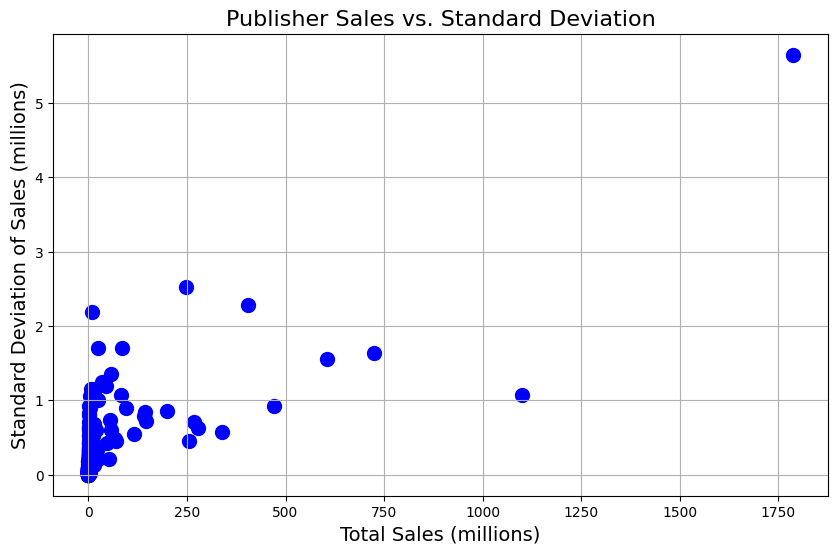

In [17]:
# Calculate the standard deviation of sales for each publisher
publisher_stats = df.groupby('Publisher')['Global_Sales'].agg(['sum', 'std'])

# Sort by total sales
publisher_stats = publisher_stats.sort_values(by='sum', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(publisher_stats['sum'], publisher_stats['std'], color='blue', s=100)

# Set axis labels
plt.xlabel('Total Sales (millions)', fontsize=14)
plt.ylabel('Standard Deviation of Sales (millions)', fontsize=14)
plt.title('Publisher Sales vs. Standard Deviation', fontsize=16)

# Show the plot
plt.grid(True)
plt.show()


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Assuming publisher_stats is your DataFrame with 'sum' as total sales and 'std' as standard deviation of sales

# Normalize both 'sum' (sales) and 'std' (variance) using MinMax scaling
scaler = MinMaxScaler()

# Normalize the 'sum' (total sales) and 'std' (standard deviation)
publisher_stats[['sum_normalized', 'std_normalized']] = scaler.fit_transform(
    publisher_stats[['sum', 'std']])

# Filter out publishers with total sales <= 50 million
publisher_stats_filtered = publisher_stats[publisher_stats['sum'] > 50]

# Create a combined score: higher sales and lower variance are preferred
# A simple combination could be (scaled_sales - scaled_variance) to favor high sales and low variance
publisher_stats_filtered['combined_score'] = publisher_stats_filtered['sum_normalized'] - publisher_stats_filtered['std_normalized']

# Sort by the combined score, and get top 100 publishers
top_publishers_combined = publisher_stats_filtered.sort_values(by='combined_score', ascending=False).head(100)

C:\Users\hp\AppData\Local\Temp\ipykernel_16460\462615651.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisher_stats_filtered['combined_score'] = publisher_stats_filtered['sum_normalized'] - publisher_stats_filtered['std_normalized']


C:\Users\hp\AppData\Local\Temp\ipykernel_16460\3305091535.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(top_publishers_combined['sum'][i] + 1, top_publishers_combined['std'][i], publisher, fontsize=8)


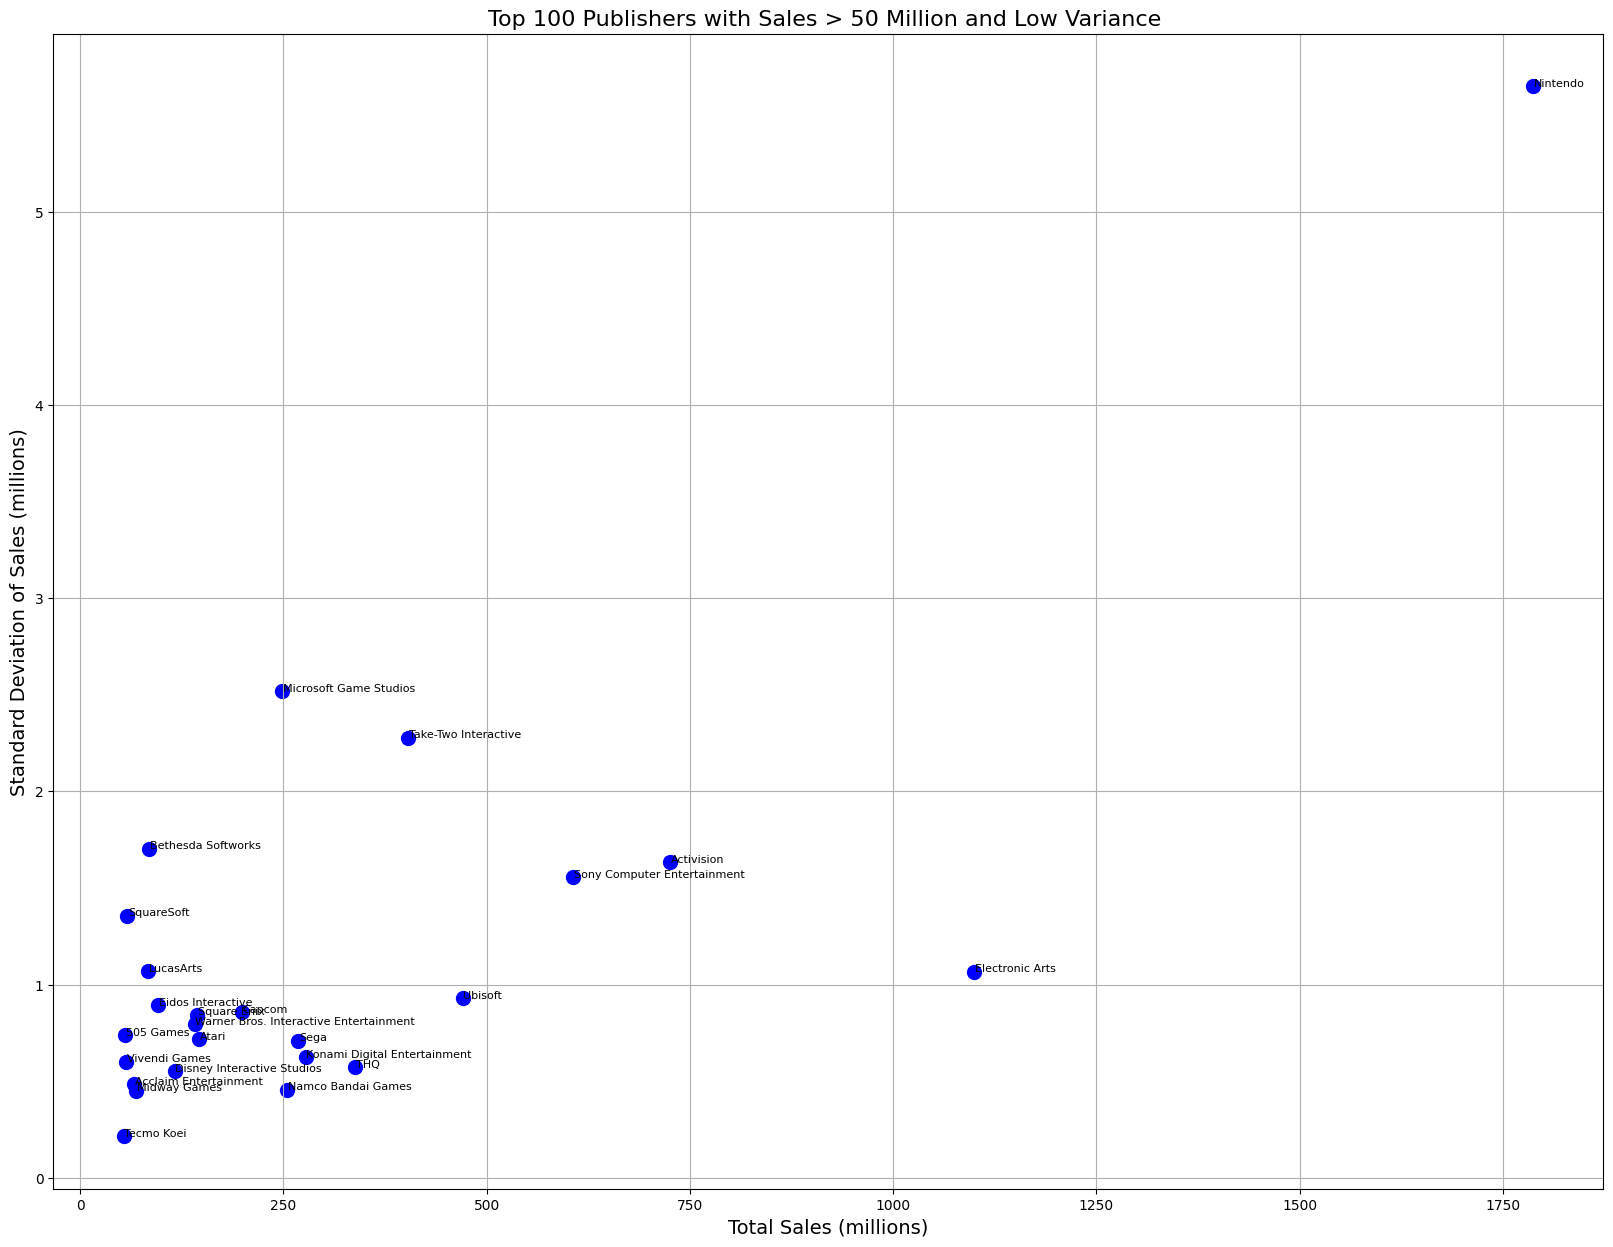

In [19]:
# Analyzing publishers's sales 
plt.figure(figsize=(20, 15))
plt.scatter(top_publishers_combined['sum'], top_publishers_combined['std'], color='blue', s=100)

# Add labels for each point (Publisher name)
for i, publisher in enumerate(top_publishers_combined.index):
    plt.text(top_publishers_combined['sum'][i] + 1, top_publishers_combined['std'][i], publisher, fontsize=8)

# Set axis labels
plt.xlabel('Total Sales (millions)', fontsize=14)
plt.ylabel('Standard Deviation of Sales (millions)', fontsize=14)
plt.title('Top 100 Publishers with Sales > 50 Million and Low Variance ', fontsize=16)

# Show the plot
plt.grid(True)
plt.show()



In [20]:
#Identifying the unique element of Rating
df["Rating"].unique()

array(['E', 'None', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [21]:
df["Rating"].value_counts()

Rating
None    6681
E       3922
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [22]:
# Define the mapping of codes to their full names
rating_mapping = {
    "E": "Everyone",
    "None": "Unknown",
    "M": "Mature 17+",
    "T": "Teen",
    "E10+": "Everyone 10+",
    "K-A": "Kids to Adults",
    "AO": "Adults Only 18+",
    "EC": "Early Childhood",
    "RP": "Rating Pending"
}

# Replace the codes in the 'Rating' column with full names
df["Rating"] = df["Rating"].replace(rating_mapping)



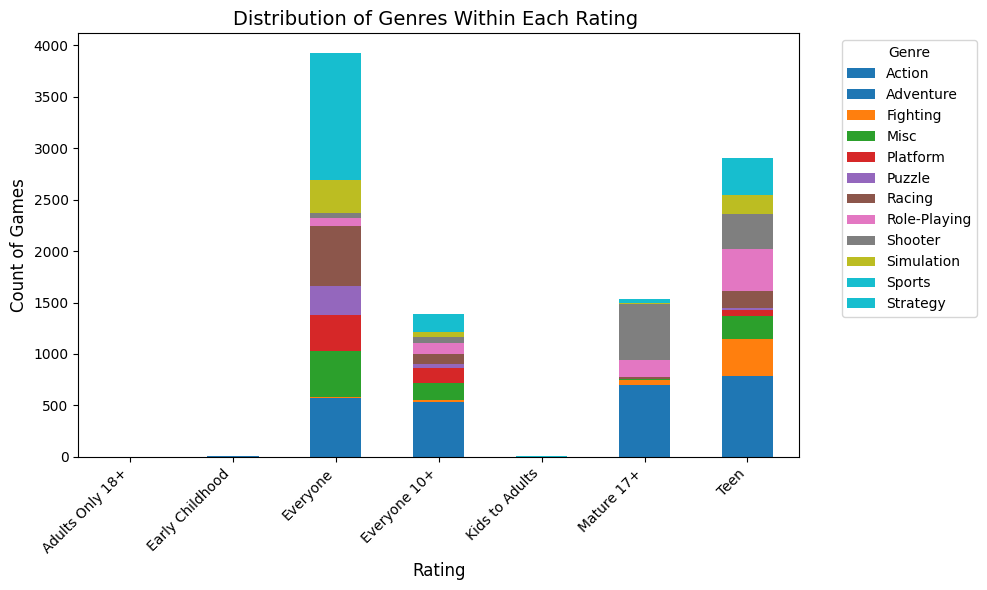

In [23]:
# Filter out rows where Rating is "Unknown" or "Rating Pending"
filtered_df = df[~df["Rating"].isin(["Unknown", "Rating Pending"])]

# Group by 'Rating' and 'Genre' to get counts
rating_genre_distribution = filtered_df.groupby(["Rating", "Genre"]).size().unstack(fill_value=0)

# Plot the stacked bar graph
rating_genre_distribution.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6), 
    colormap="tab10"
)

# Customize the plot
plt.title("Distribution of Genres Within Each Rating ", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count of Games", fontsize=12)
plt.legend(title="Genre", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


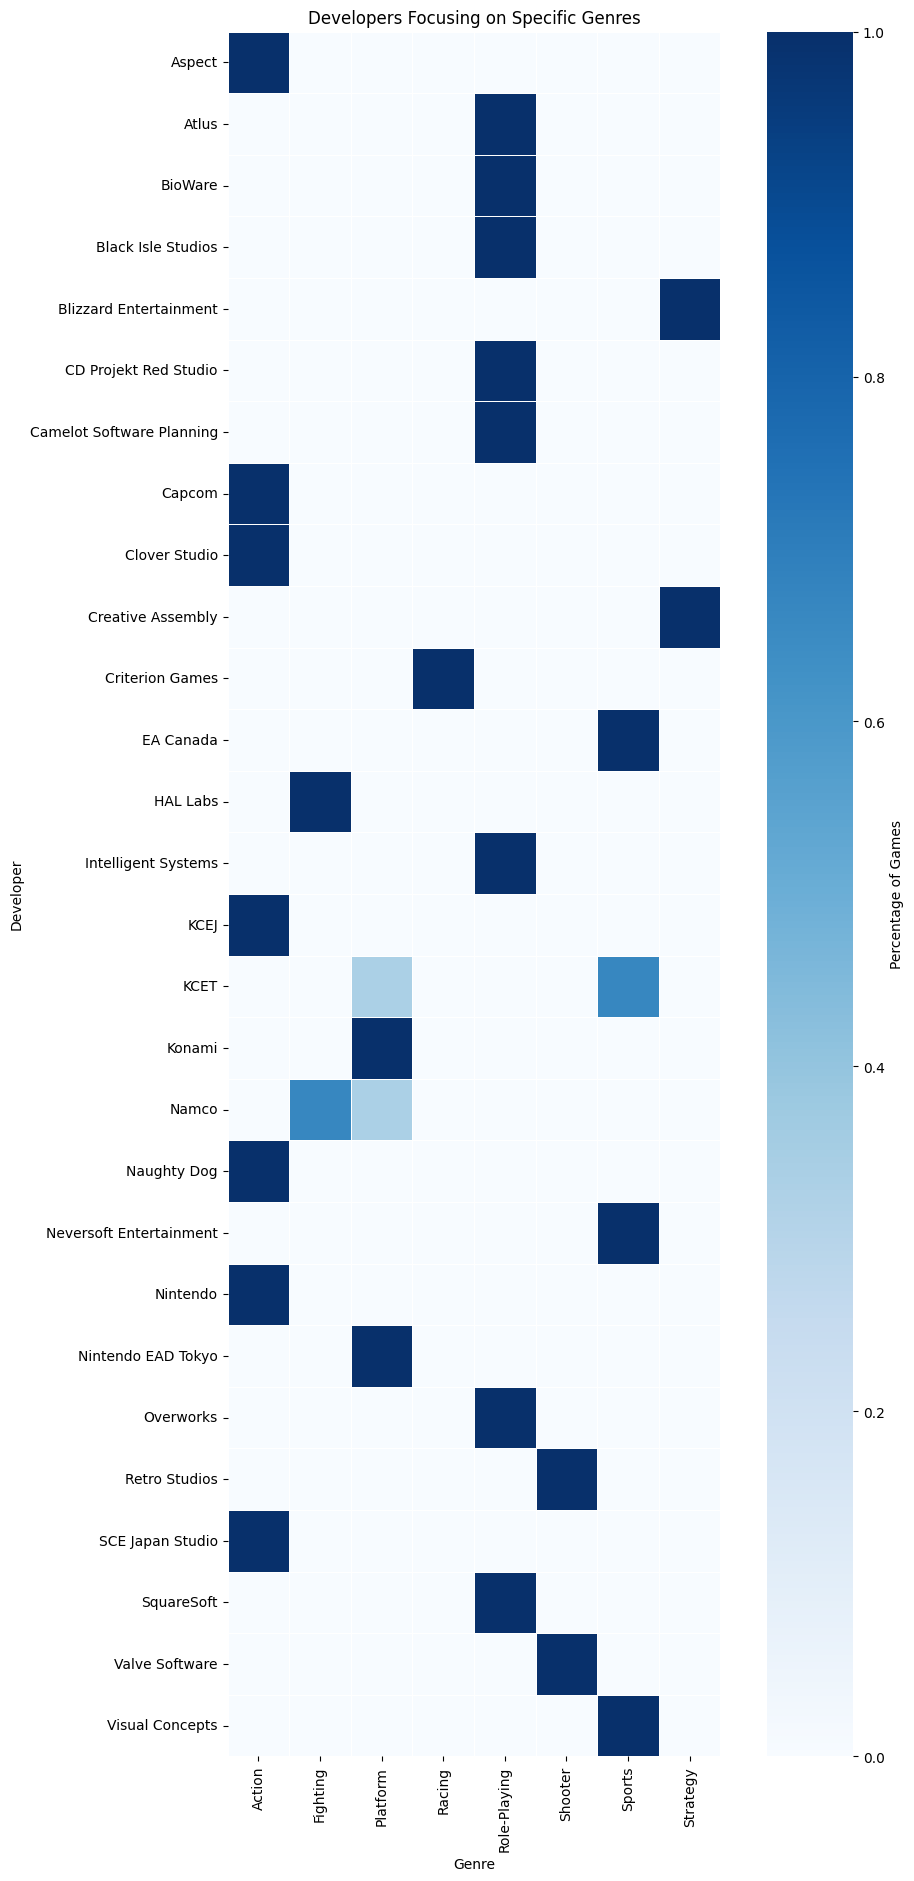

In [24]:
# Analyzing distribution of Genre accross Developers 
# Filter developers based on user and critic scores
filtered_df = df[(df['User_Score'] > 9) & (df['Critic_Score'] > 90)]

# For developers focusing on specific genres, group by developer and genre
developer_genre_df = filtered_df.groupby(['Developer', 'Genre']).size().unstack(fill_value=0)

# Normalize the data to percentages by dividing each genre count by the total count per developer
developer_genre_df_percentage = developer_genre_df.div(developer_genre_df.sum(axis=1), axis=0)

# Adjust figure size based on the number of rows and columns
plt.figure(figsize=(len(developer_genre_df.columns) * 1.5, len(developer_genre_df.index) * 0.8))

# Plot the heatmap with percentage distribution
heatmap = sns.heatmap(developer_genre_df_percentage, annot=False, cmap='Blues', square=True, 
                      linewidths=0.5, cbar_kws={'label': 'Percentage of Games'})

# Manually set color bar ticks from 0 to 1 (representing 0% to 100%)
colorbar = heatmap.collections[0].colorbar
# colorbar.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Title and labels for heatmap
plt.title('Developers Focusing on Specific Genres')
plt.xlabel('Genre')
plt.ylabel('Developer')

# Show the plot
plt.show()


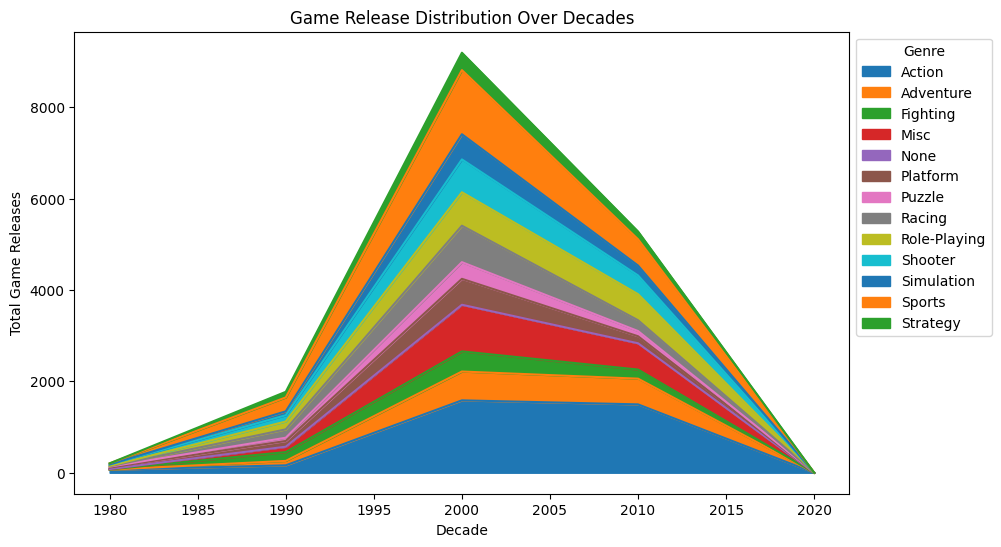

In [25]:
# Analyzing No of game release  of each genre in decades
# Creating a 'Decade' column  
df['Decade'] = (df['Year_of_Release'] // 10) * 10  

# Grouping data by decade and genre, counting the number of games  
games_by_decade_genre = df.groupby(['Decade', 'Genre']).size().unstack(fill_value=0)  

# Plotting the stacked area chart  
games_by_decade_genre.plot(kind='area', stacked=True, figsize=(10, 6))  

# Adding labels and title  
plt.title('Game Release Distribution Over Decades')  
plt.xlabel('Decade')  
plt.ylabel('Total Game Releases')  
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')  

plt.show()


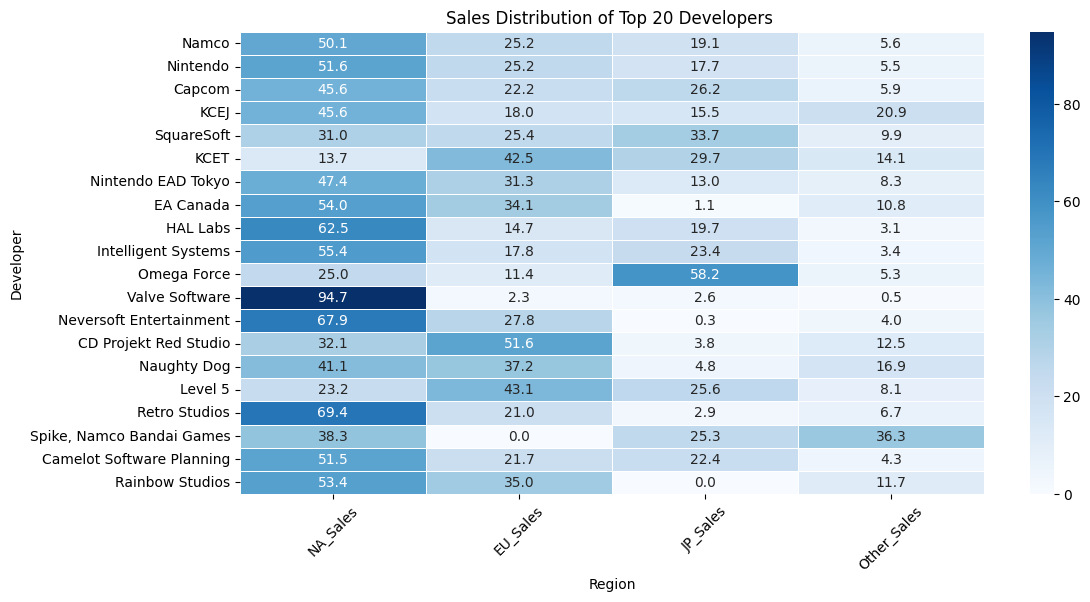

In [26]:
# Filter games with User_Score > 9
high_rated_games = df[df["User_Score"] > 9]

# Group by Developer and sum sales across regions
developer_sales = high_rated_games.groupby("Developer")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Select top 20 developers by total sales
top_20_developers = developer_sales.sum(axis=1).nlargest(20).index
top_20_sales = developer_sales.loc[top_20_developers]

# Normalize sales (percentage per developer)
top_20_sales_percentage = top_20_sales.div(top_20_sales.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(top_20_sales_percentage, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)

# Formatting
plt.title("Sales Distribution of Top 20 Developers ")
plt.xlabel("Region")
plt.ylabel("Developer")
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [27]:
''' Conclusion : 

1. Developers who have remained dedicated to a single genre tend to receive higher ratings from both critics and users.

From total sales, North America is having large share in sales accross all the developers.

The Action genre consistently holds a significant share across nearly all gaming platforms.

Between 1990 and 2000, the number of game releases in the Adventure and Action genres surged, but in the following decade, the release rate stabilized.

Console platforms see a large volume of game releases, but with high variance in sales and reception. In contrast, PC game releases remain relatively steady, exhibiting lower variance.

'''


'Developers who have remained dedicated to a single genre tend to receive higher ratings from both critics and users.\n\nFrom total sales, North America is having large share in sales accross all the developers.\n\nThe Action genre consistently holds a significant share across nearly all gaming platforms.\n\nBetween 1990 and 2000, the number of game releases in the Adventure and Action genres surged, but in the following decade, the release rate stabilized.\n\nConsole platforms see a large volume of game releases, but with high variance in sales and reception. In contrast, PC game releases remain relatively steady, exhibiting lower variance.\n\n'